In [2]:
import numpy as np
from skimage import io

img = io.imread('/home/lq53/mir_repos/histology_for_minji/no_color_fix/ch00.tiff')
print(f"Shape: {img.shape}, dtype: {img.dtype}")

Shape: (1942, 1950), dtype: uint8


DAPI: shape=(1942, 1950), dtype=uint8
TH: shape=(1942, 1950), dtype=uint8
Oxy: shape=(1942, 1950), dtype=uint8
cFos: shape=(1942, 1950), dtype=uint8

DAPI
  Min: 0
  Max: 255
  Mean: 53.18
  Std: 47.37
  Non-zero pixels: 3324220/3786900 (87.78%)
  Brightest pixel: value=255 at location (np.int64(5), np.int64(1937))

TH
  Min: 0
  Max: 255
  Mean: 17.51
  Std: 11.04
  Non-zero pixels: 3321886/3786900 (87.72%)
  Brightest pixel: value=255 at location (np.int64(33), np.int64(1252))

Oxy
  Min: 0
  Max: 255
  Mean: 15.83
  Std: 9.98
  Non-zero pixels: 3320407/3786900 (87.68%)
  Brightest pixel: value=255 at location (np.int64(157), np.int64(1296))

cFos
  Min: 0
  Max: 255
  Mean: 23.86
  Std: 15.99
  Non-zero pixels: 3363784/3786900 (88.83%)
  Brightest pixel: value=255 at location (np.int64(42), np.int64(1020))



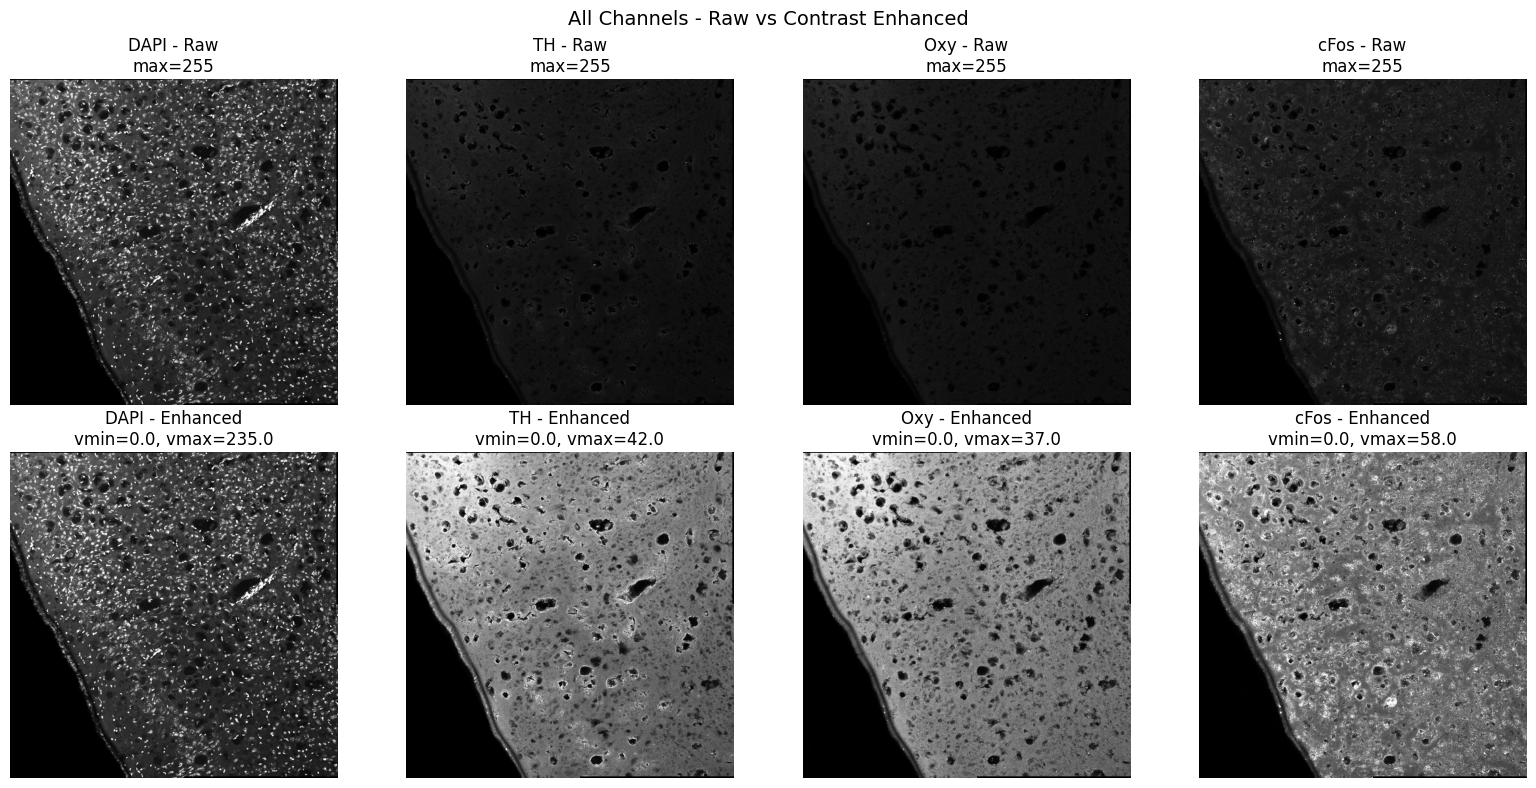

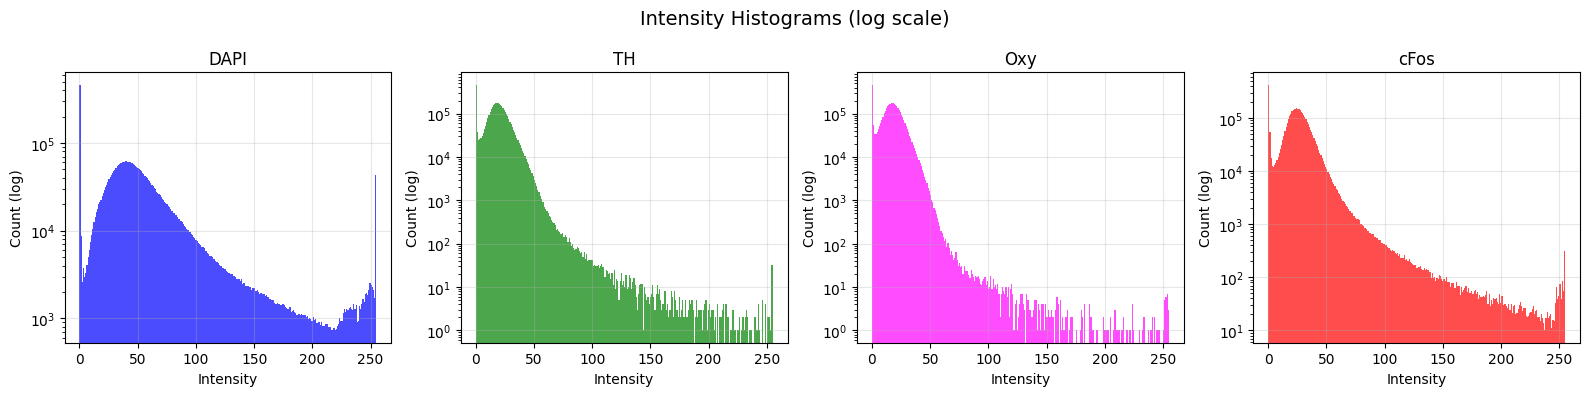

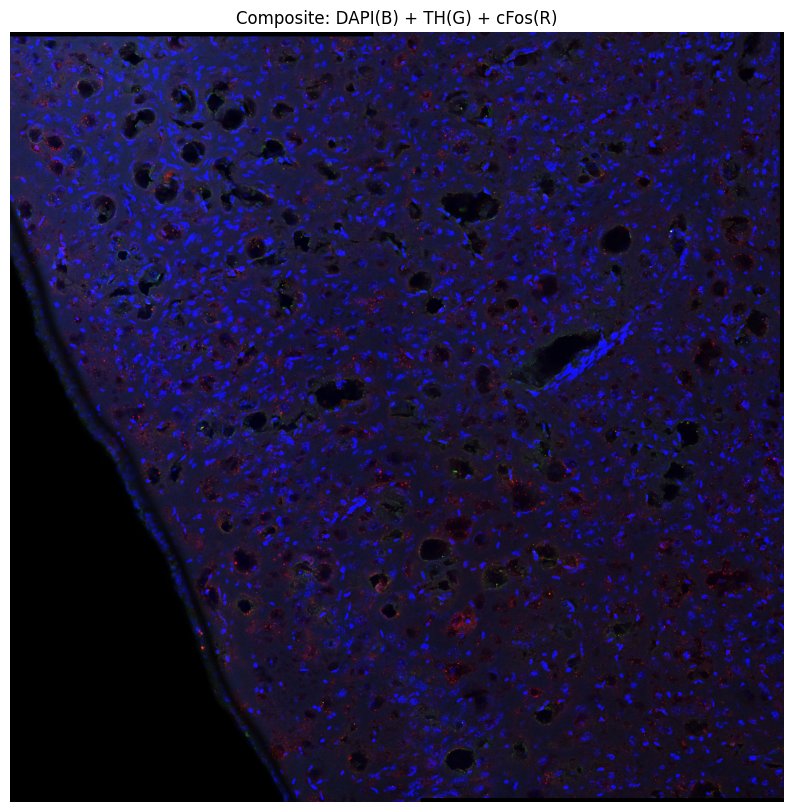

ANALYSIS COMPLETE


In [3]:
from skimage import io, exposure
import matplotlib.pyplot as plt
import numpy as np

# Your grayscale images - each channel is a separate file
base_path = '/home/lq53/mir_repos/histology_for_minji/no_color_fix/'
files = [
    ('DAPI', 'ch00.tiff'),
    ('TH', 'ch01.tiff'),
    ('Oxy', 'ch02.tiff'),
    ('cFos', 'ch03.tiff'),
]

# Load all channels
channels = {}
for name, file in files:
    img = io.imread(base_path + file)
    channels[name] = img
    print(f"{name}: shape={img.shape}, dtype={img.dtype}")

print("\n" + "="*60)

# Detailed analysis for each channel
for name, ch in channels.items():
    print("="*60)
    print(f"{name}")
    print("="*60)
    
    print(f"  Min: {ch.min()}")
    print(f"  Max: {ch.max()}")
    print(f"  Mean: {ch.mean():.2f}")
    print(f"  Std: {ch.std():.2f}")
    
    nonzero = np.count_nonzero(ch)
    total = ch.size
    print(f"  Non-zero pixels: {nonzero}/{total} ({nonzero/total*100:.2f}%)")
    
    if ch.max() > 0:
        brightest_val = ch.max()
        brightest_loc = np.unravel_index(ch.argmax(), ch.shape)
        print(f"  Brightest pixel: value={brightest_val} at location {brightest_loc}")
    print()

# Visual comparison - all 4 channels
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('All Channels - Raw vs Contrast Enhanced', fontsize=14)

for i, (name, ch) in enumerate(channels.items()):
    # Raw
    axes[0, i].imshow(ch, cmap='gray')
    axes[0, i].set_title(f'{name} - Raw\nmax={ch.max()}')
    axes[0, i].axis('off')
    
    # Contrast enhanced
    if ch.max() > ch.min():
        p2, p98 = np.percentile(ch, (2, 98))
        axes[1, i].imshow(ch, cmap='gray', vmin=p2, vmax=p98)
        axes[1, i].set_title(f'{name} - Enhanced\nvmin={p2:.1f}, vmax={p98:.1f}')
    else:
        axes[1, i].imshow(ch, cmap='gray')
        axes[1, i].set_title(f'{name} - All same value')
    axes[1, i].axis('off')

plt.tight_layout()
plt.savefig('grayscale_channels_comparison.png', dpi=150)
plt.show()

# Histograms
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('Intensity Histograms (log scale)', fontsize=14)
colors = ['blue', 'green', 'magenta', 'red']  # typical channel colors

for i, (name, ch) in enumerate(channels.items()):
    axes[i].hist(ch.ravel(), bins=256, log=True, color=colors[i], alpha=0.7)
    axes[i].set_xlabel('Intensity')
    axes[i].set_ylabel('Count (log)')
    axes[i].set_title(f'{name}')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
# plt.savefig('grayscale_histograms.png', dpi=150)
plt.show()

# Composite RGB view (if you want to see them merged like the original)
fig, ax = plt.subplots(figsize=(10, 10))

# Create RGB composite - adjust which channels go where based on your staining
# Typical: DAPI=blue, secondary markers in green/red
composite = np.zeros((*channels['DAPI'].shape, 3), dtype=np.float32)

for name, ch in channels.items():
    # Normalize each channel
    ch_norm = (ch - ch.min()) / (ch.max() - ch.min() + 1e-8)
    
    if name == 'DAPI':
        composite[..., 2] += ch_norm  # Blue
    elif name == 'TH':
        composite[..., 1] += ch_norm  # Green
    elif name == 'cFos':
        composite[..., 0] += ch_norm  # Red
    # Oxy could be added to another channel or skipped

composite = np.clip(composite, 0, 1)
ax.imshow(composite)
ax.set_title('Composite: DAPI(B) + TH(G) + cFos(R)')
ax.axis('off')
# plt.savefig('grayscale_composite.png', dpi=150)
plt.show()

print("="*60)
print("ANALYSIS COMPLETE")
print("="*60)